In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

In [110]:
titatnic = pd.read_csv("resources/titanic_train.csv")

In [111]:
titatnic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handle missing Data -> will chcek via a heat map. We can see that there is alot of ages in the data set missing. Ages a Cabin. Since cabin is not a important variable in our data set we can most likely remove column. To get the  a proper age replace ment we will need to find the average age for each passanger relate dto some variable.

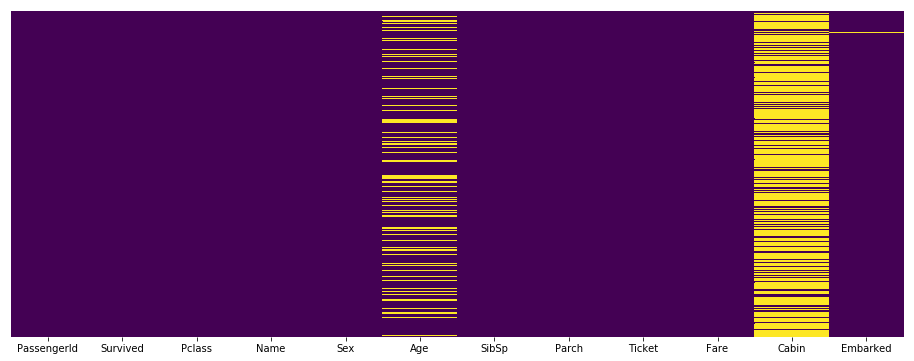

In [112]:
plt.figure(figsize= (16,6))
sns.heatmap(titatnic.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### replacing missing ages. We will look at the average age per pclass to consider a resonable age replacement. Our plot below shows the average age of of paggangers in class1 was 43, 2 was 28, and 3 was 25. So lets take these into consideration when replacing ages.

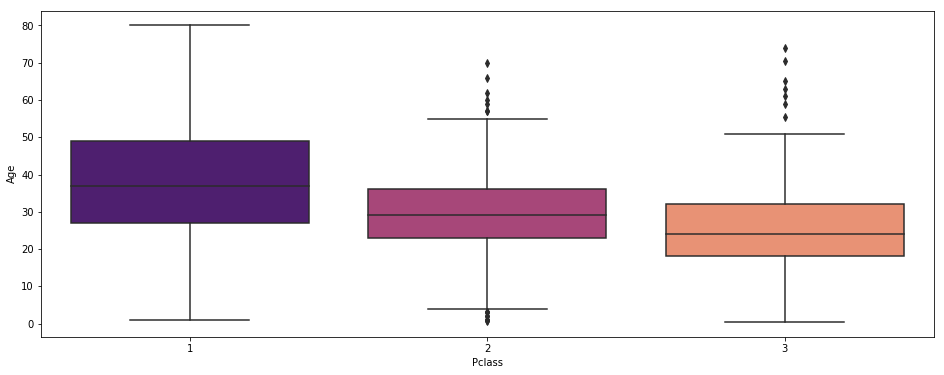

In [113]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "Pclass", y = "Age", data=titatnic, palette= "magma")

### WE will use the funciton below to impute the missing ages

In [114]:
def replace_ages(columns):
    pclass = columns[0]
    ages = columns[1]
    
    if pd.isnull(ages):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return ages

In [115]:
titatnic["Age"] = titatnic[["Pclass", "Age"]].apply(replace_ages, axis = 1)

### We will inspect if our imputation worked correctly by reinspecting out heat map. Looks like we have replaced all missing ages correctly. Below we will drop the cabin column from our data since it will not be needed

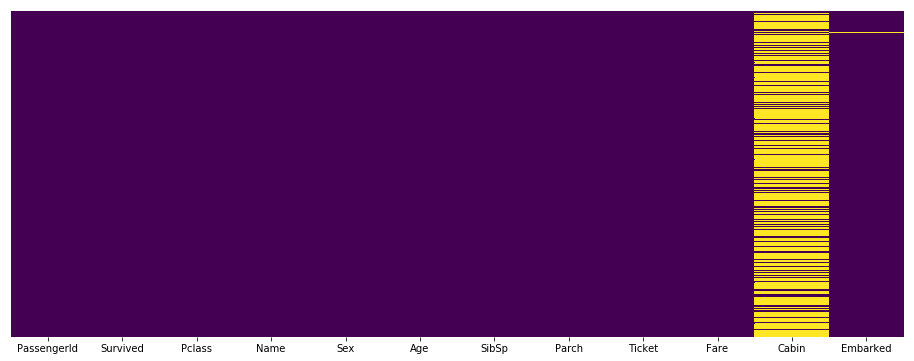

In [116]:
plt.figure(figsize= (16,6))
sns.heatmap(titatnic.isnull(), yticklabels=False, cbar=False, cmap="viridis");

#### Drop Cabin column. Looks like we have one fare missing so we will drop that cell to continue our analysis

In [117]:
titatnic.drop('Cabin', axis=1, inplace=True)

In [118]:
titatnic.dropna(inplace=True)

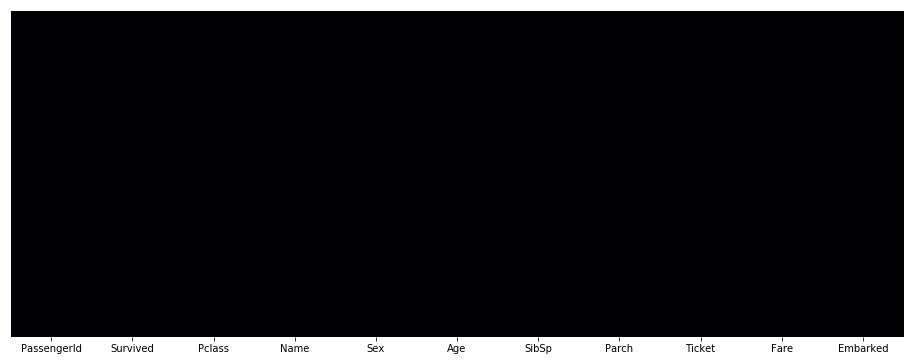

In [119]:
plt.figure(figsize= (16,6))
sns.heatmap(titatnic.isnull(), yticklabels=False, cbar=False, cmap="magma");

In [120]:
titatnic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## We want our model to cosider the sex of the passanger so we will need to convert these to numerical data to represent male and femal using pandas dummies

In [121]:
titatnic["Sex"] = pd.get_dummies(titatnic["Sex"], drop_first=True)

In [122]:
titatnic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


## will also transform the embarked column to dummies as well. Looks like we have all the numerical data we will need for our model. Lets remove all other data from the data frame to prep for our model development

In [123]:
titatnic[["Q","S"]] = pd.get_dummies(titatnic["Embarked"], drop_first=True)

In [124]:
titatnic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [125]:
titatnic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Q', 'S'],
      dtype='object')

In [126]:
titatnic.drop(['PassengerId', 'Name', 'Parch','Ticket', "Embarked"], axis=1, inplace=True)

### We will be using a clasification model to predict if a passamger would have surivied or not

In [127]:
titatnic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S
0,0,3,1,22.0,1,7.2500,0,1
1,1,1,0,38.0,1,71.2833,0,0
2,1,3,0,26.0,0,7.9250,0,1
3,1,1,0,35.0,1,53.1000,0,1
4,0,3,1,35.0,0,8.0500,0,1


### Import necessary Libraries

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
X = titatnic.drop("Survived", axis=1)
y = titatnic["Survived"]

### Training and testing Data

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [131]:
log_classifier = LogisticRegression()

## Fit model to training data

In [132]:
log_classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Get predicitons using model

In [133]:
predictions =log_classifier.predict(X_test)

### Lets see how our model performed

In [134]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.80      0.65      0.72       104

   micro avg       0.80      0.80      0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [135]:
print(confusion_matrix(y_test,predictions))

[[146  17]
 [ 36  68]]
